# Resampling raster data in an easy way with Python custom classes and methods

Import custom class _RasterMap_ which allows easy manipulation of rasters through numpy and gdal libraries:

In [1]:
from geotools.raster import RasterMap

Create a _RasterMap_ instance of the yearly solar map of French Guiana:

In [2]:
solar_map = RasterMap("/home/benjamin/Documents/Post-doc Guyane/Data/Resource rasters/Solar maps/Yearly solar map French Guyana/Irr_Total_GHI.img", no_data_value=-9999)

Plot solar map:

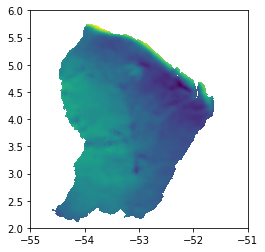

In [3]:
solar_map.plot()

Use gdal method to resample raster by a factor 3:

In [13]:
solar_map_resampled = solar_map.gdal_resample(3)

In [8]:
solar_map_resampled.x_size, solar_map_resampled.y_size

(3999, 3999)

In [9]:
solar_map.x_size, solar_map.y_size

(1333, 1333)

Save new resampled raster to file:

In [10]:
solar_map_resampled.to_file('test_solar_map.tif')

0

Look at new raster file:

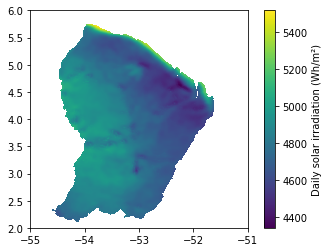

In [11]:
new_solar_map = RasterMap("test_solar_map.tif", no_data_value=-9999)
new_solar_map.plot(colorbar=True, colorbar_title="Daily solar irradiation (Wh/m²)")

Do the same for monthly solar maps:

In [ ]:
from utils.sys.browser import find_file
old_path = "/home/benjamin/Documents/Post-doc Guyane/Data/Resource rasters/Solar maps/Monthly solar maps French Guyana/"
new_path = "/home/benjamin/Documents/Post-doc Guyane/Data/Resource rasters/Solar maps/Monthly GHI/"
solar_map_files = find_file(".img", old_path)
solar_map_files =sorted(solar_map_files)
for n, file in enumerate(solar_map_files):
    smap = RasterMap(file, no_data_value=-9999)
    smap = smap.gdal_resample(3)
    smap.to_file(new_path + 'monthly_GHI_%02d.tif' % (n+1))

Try to look at GHI in April for instance:

In [ ]:
april_map = RasterMap(new_path + 'monthly_GHI_04.tif', no_data_value=-9999)
april_map.plot(colorbar=True, colorbar_title="Daily solar irradiation (Wh/m²)")